In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc

In [2]:
# Load data and add column names
folder = '.\Results\AutoXYTest_20230501_115509'
name = '\AutoXYTest_20230501_115509\FullList'
winlist = '\AutoXYTest_20230501_115509\WinList'
losslist = '\AutoXYTest_20230501_115509\LossList'
headers = ['X (mm)', 'Y (mm)']
data = pd.read_csv('.\Results\%s.csv' %name, names=headers) #select your file
wins = pd.read_csv('.\Results\%s.csv' %winlist, names=headers) #select your file
losses = pd.read_csv('.\Results\%s.csv' %losslist, names=headers) #select your file
#start = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: (x != 0) and not x % 2)
#start = data.iloc[::2, :]
#destination = pd.read_csv('.\Results\pre_20230113_145250.csv', nrows=1, names=headers) #select your file
destination = data.iloc[1::2, :]
#end = pd.read_csv('.\Results\AutoXYTest_20230116_164712.csv', names=headers, skiprows=lambda x: x % 2)
#end = data.iloc[2::2, :]
moves = data.iloc[0::2, :]

In [3]:
print(moves)
print(destination)

        X (mm)     Y (mm)
0    14.614547  11.190058
2    15.571368  13.229784
4    15.650761  13.262145
6    15.724307  13.275711
8    12.754160   9.893023
10   12.784388   9.594651
12   12.781152   9.529329
14   12.777953   9.468035
16   12.787067   9.405569
18   13.146293   9.748334
20   13.248729   9.682869
22   13.295842   9.683986
24   13.272115   9.689272
26   13.269056   9.637238
28   14.335463  12.438387
30   14.421091  12.436994
32   14.448162  12.434212
34   15.489411  12.130558
36   15.568750  12.056673
38   15.590164  12.054276
40   15.607763  12.051330
42   15.607895  12.046891
44   13.729746  10.307013
46   13.732087  10.091066
48   13.737376  10.012523
50   15.770129  11.267544
52   15.810574  11.360613
54   15.809153  11.358783
56   15.809859  11.352778
58   15.811798  11.351582
60   15.812471  11.350044
62   15.812544  11.344409
64   15.812450  11.346074
66   15.813757  11.345494
68   15.812876  11.344400
70   12.735487  12.433755
72   12.843078  12.425840
74   12.8868

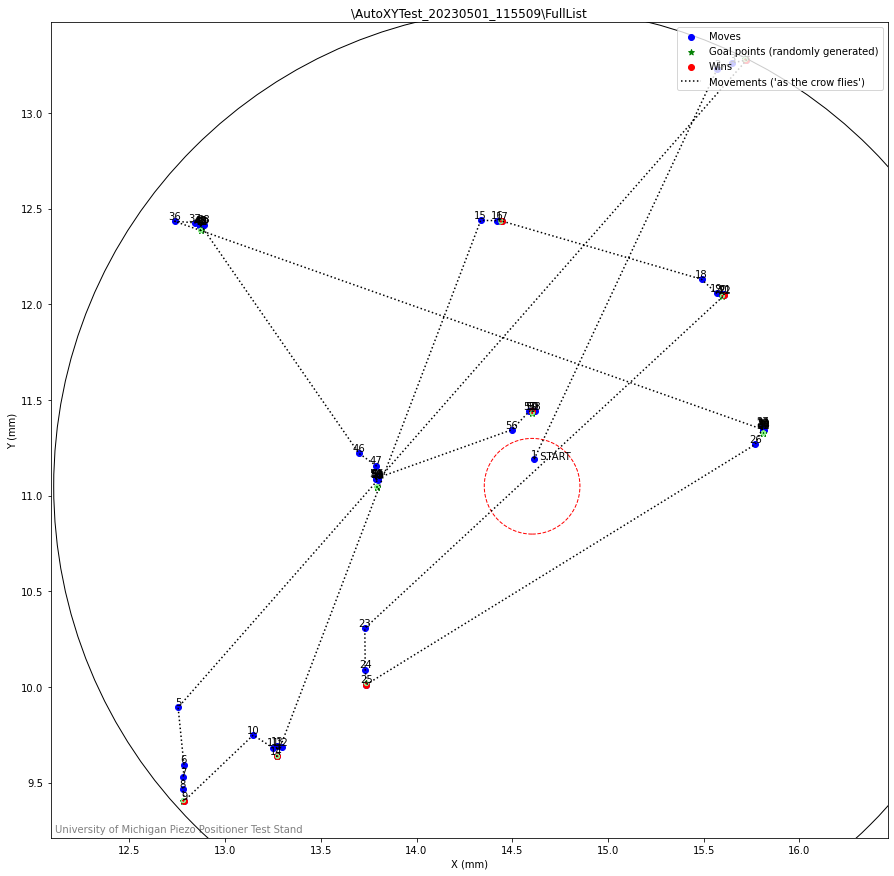

In [4]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves")
plt.scatter(destination['X (mm)'], destination['Y (mm)'],c='green',label="Goal points (randomly generated)",marker = '*')
plt.scatter(wins['X (mm)'], wins['Y (mm)'],c='red',label="Wins",marker = 'o')
#for (xi, yi, i) in zip(destination['X (mm)'], destination['Y (mm)'],steps):
    #plt.text(xi, yi, i, va='bottom', ha='center')
#plt.scatter(end['X (mm)'], end['Y (mm)'],color='blue',label="Ending points")
for (xi, yi, i) in zip(moves['X (mm)'], moves['Y (mm)'],steps):
    plt.text(xi, yi, i, va='bottom', ha='center')
    
circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

#print(list(range(1,len(destination['X (mm)']) +1)))

data_index1 = destination.index.tolist()
for i in data_index1:
    circle = plt.Circle( (destination['X (mm)'][i] , destination['Y (mm)'][i]), 0.01 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )
    

plt.text(data['X (mm)'][0],data['Y (mm)'][0],'  START',size = 10)
#plt.text(end['X (mm)'][-1:],end['Y (mm)'][-1:],'  END',size = 10)
plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements ('as the crow flies')" )

#endx = end['X (mm)'].tolist()
#endy = end['Y (mm)'].tolist()
#destx = destination['X (mm)'].tolist()
#desty = destination['Y (mm)'].tolist()

#xdiffs = np.subtract(destx, endx)
#xerror = list(xdiffs)

#ydiffs = np.subtract(desty, endy)
#yerror = list(ydiffs)


#plt.quiver(end['X (mm)'], end['Y (mm)'], xerror, yerror, scale_units ='xy', scale = 1, width=.002,color='orange',label="Error")

ab = AnchoredText("University of Michigan Piezo Positioner Test Stand", loc="lower left", frameon=False, borderpad=0, prop=dict(alpha=0.5), )
ab.set_zorder(0)
ax.add_artist(ab)

plt.title(name)
plt.axis('equal')
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='upper right')
plt.savefig(folder + '\FullPlot')
plt.show()

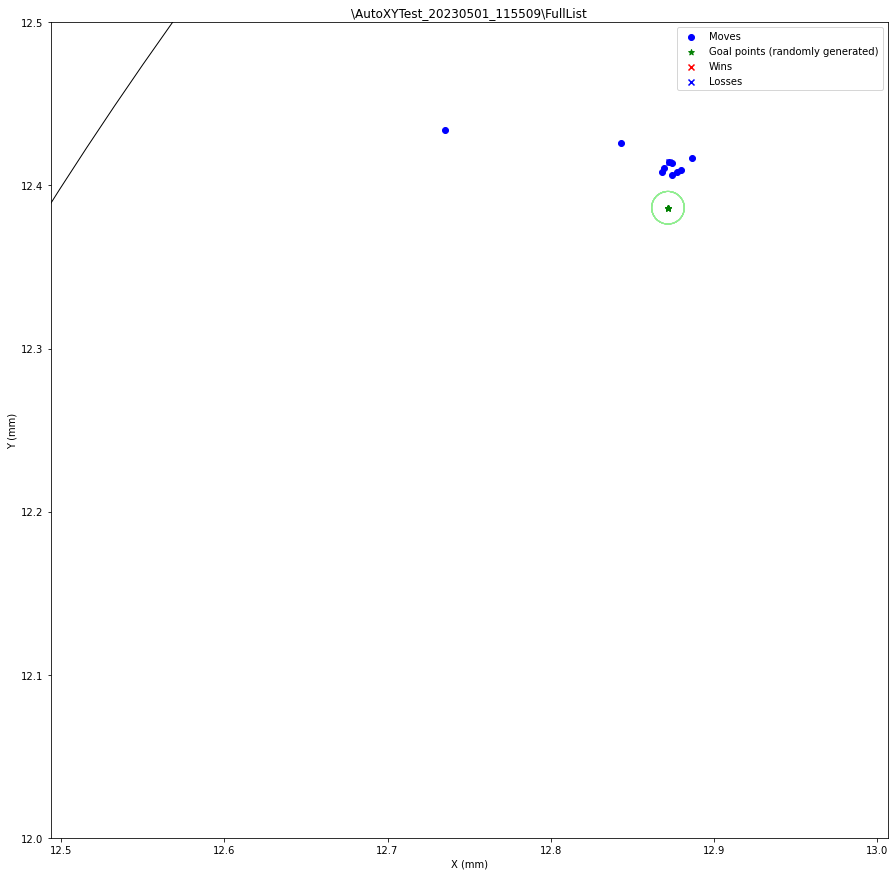

In [6]:
# Plot
steps = list(range(1,len(moves['X (mm)']) +1))
#print(steps)
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(moves['X (mm)'], moves['Y (mm)'],color='blue',label="Moves")
plt.scatter(destination['X (mm)'], destination['Y (mm)'],c='green',label="Goal points (randomly generated)",marker = '*')
plt.scatter(wins['X (mm)'], wins['Y (mm)'],c='red',label="Wins",marker = 'x')
plt.scatter(losses['X (mm)'], losses['Y (mm)'],c='blue',label="Losses",marker = 'x')

circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )


#print(len(wins['X (mm)']),'/',len(wins['X (mm)'])+len(losses['X (mm)'])) #put in the number of points assigned

data_index1 = destination.index.tolist()
for i in data_index1:
    circle = plt.Circle( (destination['X (mm)'][i] , destination['Y (mm)'][i]), 0.01 , fill = False, color = 'lightgreen', linestyle = '-')
    ax.add_artist( circle )


plt.title(name)
plt.axis('equal')
plt.xlim(12.5,13)
plt.ylim(12,12.5)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='best')
plt.savefig(folder + '\CoordsOnly')
plt.show()